Створіть повний проект по Data Science: від збору даних до побудови моделі.

Джерело даних та ціль прогнозної моделі вибираєте самостійно. Бажано вибрати якусь корисну задачу, для якої можна було б знайти застосування в реальному житті. Краще вибрати нове джерело даних. Але на крайній випадок можна взяти дані з Проетів 1 чи 2.

Він має включати такі основні кроки:
збір даних з різних джерел
збереження цих даних (база даних, csv-файли і т.п.)
попередня обробка даних (якщо потрібно)
попередній (статистичний) аналіз даних
візуалізація даних (зазвичай відбувається паралельно з попереднім пунктом)
побудова прогнозної моделі на основі алгоритмів машинного навчання
оцінка якості моделі та короткі висновки.
Роботу виконуйте в Юпітер ноутбуках.
А також підготуйте коротку презентацію. Для цього у нас заплановане окреме заняття.

## Задача

Медицинская страховая компания опубликовала данные почти 1000 клиентов. Создайте модель, которая прогнозирует ежегодную стоимость медицинского покрытия. Данные добровольно предоставляются клиентами.

Содержание

Набор данных содержит параметры, связанные со здоровьем клиентов. Используйте их для создания модели, а также для выполнения EDA(анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации) на том же самом.
Премиальная цена указана в индийских рупиях (₹) и показывает цены на весь год.

Помогите решить важную финансовую проблему, которая может затронуть многих людей и помочь им принимать более взвешенные решения.

[Более подробную информацию о данных можно получить здесь](https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction)

* Age -возраст клиента
* Diabetes - Есть ли у клиента аномальный уровень сахара в крови
* BloodPressureProblems - Есть ли у клиента аномальный уровень артериального давления
* AnyTransplants - Любые крупные трансплантации органов
* Height - рост клиента
* Weight - вес клиента
* KnownAllergies - Есть ли у клиента известные аллергии 
* HistoryOfCancerInFamily - Была ли у кого-либо из кровных родственников клиента какая-либо форма рака
* NumberOfMajorSurgeries - Количество серьезных операций, которые перенес клиент
* PremiumPrice - цена на страховку клиента

In [242]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

In [285]:
df=pd.read_csv('Medicalpremium.csv')

In [244]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


Как видим, все наши данные числовые, пропусков нет,что хорошо для построения модели. 
Посмотрим основные описательные статистики для наших данных.

In [246]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


Посмотрим попарные scater plots для 4х числовых признаков

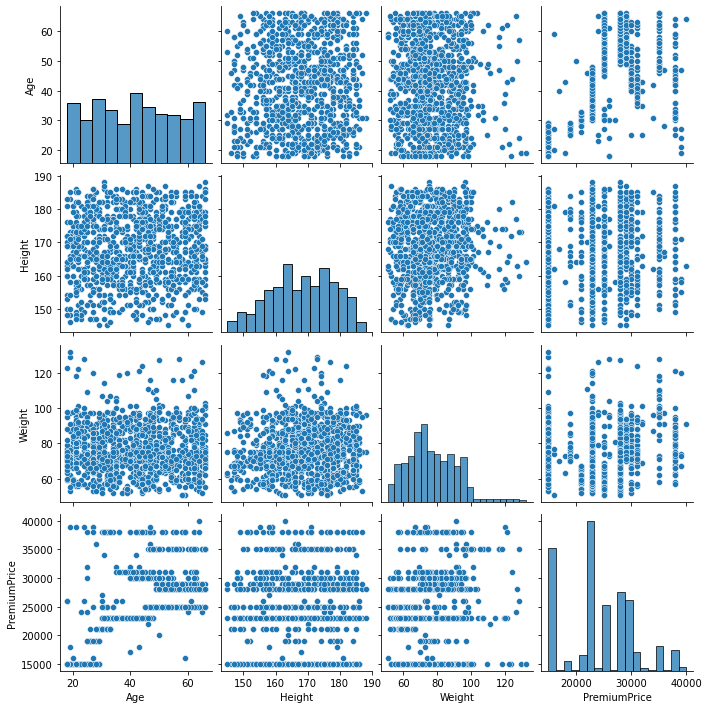

In [247]:
sns.pairplot(df,vars=['Age','Height','Weight','PremiumPrice'])

Построим тепловую карту и выведем значения корреляций для каждой переменной.

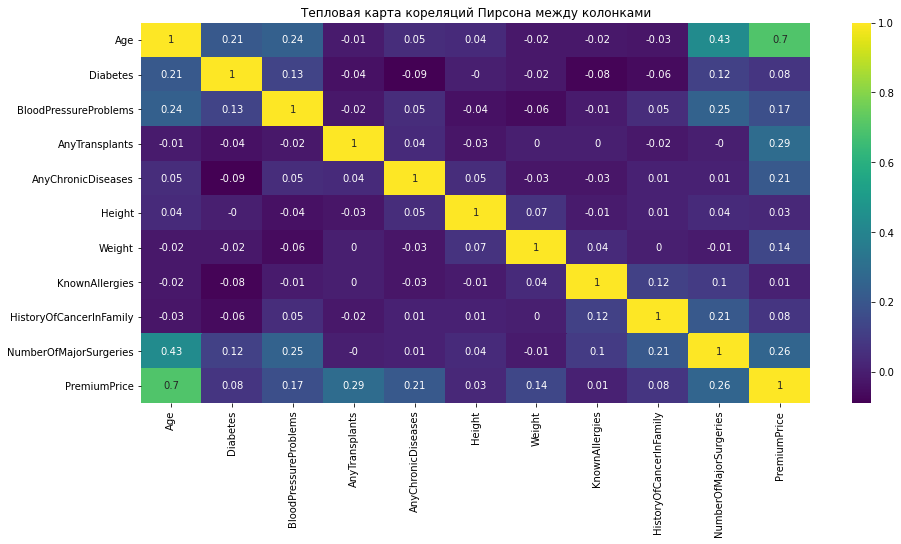

In [248]:
fig, axes = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis')
plt.title("Тепловая карта кореляций Пирсона между колонками")
plt.show()

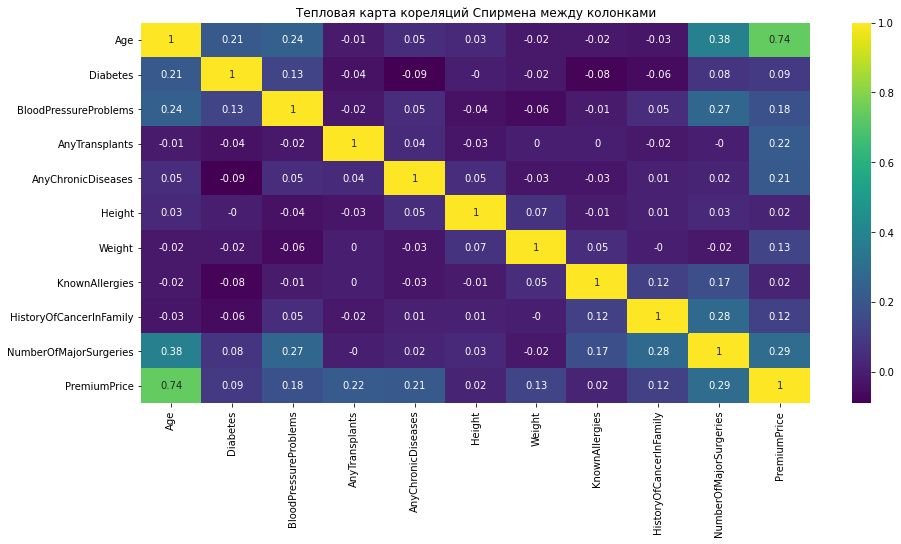

In [249]:
fig, axes = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr('spearman').round(2), annot=True, cmap='viridis')
plt.title("Тепловая карта кореляций Спирмена между колонками")
plt.show()


Как видно, наибольшую кореляцию целевая переменная имеет с возрастом, наименьшую - с алергией. Существенного разлилия в корреляции Пирсона и Спирмена между переменными нет.


Попробуем постороить разные модели для прогнозирования нашей целевой переменной.
Для этого создадим функцию, которая будет тренировать наши данные с помощью нескольких моделей и выводить оценку точности для выбора оптимальной.

In [250]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_percentage_error
 

In [274]:
def different_models(X_train1, X_test1, y_train1, y_test1):

    models = {
        'Linear Regression':LinearRegression(),
        'Lasso':Lasso(),
        'Ridge':Ridge(),
        'RandomForest':RandomForestRegressor(n_estimators=1000,random_state=1),
        'GradientBoostingRegressor':GradientBoostingRegressor(n_estimators=1000,random_state=1),
        'XGBRFRegressor':XGBRFRegressor()
         }
    for k,m in models.items():
        
        m.fit(X_train1,y_train1)
        y_pred = m.predict(X_test1)
        y_pred_train=m.predict(X_train1)
    
        print(f"Оценка точности для {k}:")
    
        print("Коэфициент детерминации:",(m.score(X_test1,y_test1)*100),"%")
        print("Погрешность для тренировочных данных:",mean_absolute_percentage_error(y_train1, y_pred_train) * 100)
        print("Погрешность для тестовых данных:",mean_absolute_percentage_error(y_test1, y_pred) * 100,end="\t")
        print("\n")

               

In [275]:
X=df.drop('PremiumPrice',axis=1)
y=df['PremiumPrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

 

In [276]:
different_models(X_train, X_test, y_train, y_test)

Оценка точности для Linear Regression:
Коэфициент детерминации: 71.33944270278738 %
Погрешность для тренировочных данных: 11.678689538341136
Погрешность для тестовых данных: 10.96259660249471	

Оценка точности для Lasso:
Коэфициент детерминации: 71.31937853923239 %
Погрешность для тренировочных данных: 11.678180920222015
Погрешность для тестовых данных: 10.965904888291893	

Оценка точности для Ridge:
Коэфициент детерминации: 71.22528895965914 %
Погрешность для тренировочных данных: 11.678574020097876
Погрешность для тестовых данных: 10.979621332574034	

Оценка точности для RandomForest:
Коэфициент детерминации: 87.84091014040226 %
Погрешность для тренировочных данных: 1.9062435538306968
Погрешность для тестовых данных: 4.432077156964355	

Оценка точности для GradientBoostingRegressor:
Коэфициент детерминации: 76.86911141809226 %
Погрешность для тренировочных данных: 2.1252336795528803
Погрешность для тестовых данных: 8.03889306129906	

Оценка точности для XGBRFRegressor:
Коэфициент дет

Как видим исходя из полученных результатов наибольшую точность(коэффициент детерминации равен 87,92%) в сравнении с другими показывает модель XGBRFRegressor. Попробуем улучшить качество нашего прогноза.

Создадим дополнительную переменную bmi, обозначающую индекс массы тела(величина, позволяющая оценить степень соответствия
массы человека и его роста и тем самым косвенно судить о том, является ли масса недостаточной, нормальной или избыточной. 
Важен при определении показаний для необходимости лечения).

In [294]:
df['bmi'] = (df.Weight)/(((df.Height)/100)**2)


Далее попробуем удалить переменную KnownAllergies, которая имеет самую низкую корреляцию с нашей целевой переменной.

In [295]:
df=df.drop(['KnownAllergies'],axis=1)

Построим попарные scatter plots для 4х переменных с разделением на 6 ценовых категорий.

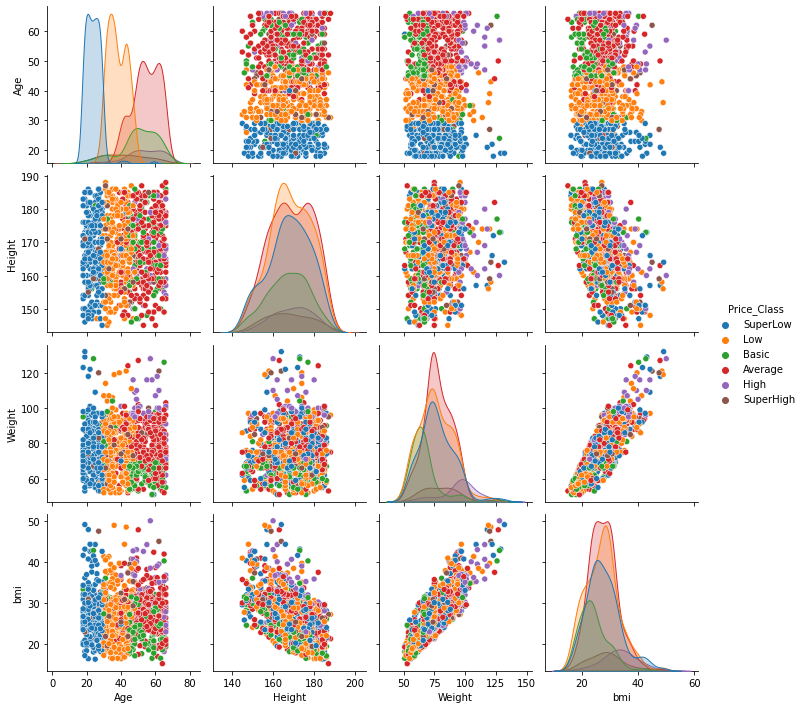

In [296]:
class_values=['SuperLow','Low','Basic','Average','High','SuperHigh']
df['Price_Class']=pd.cut(df['PremiumPrice'],bins=6,labels=class_values,precision=0)
sns.pairplot(df,vars=['Age','Height','Weight','bmi'],hue='Price_Class')
df=df.drop(['Price_Class'],axis=1)

Далее создадим новые категориальные столбцы для возраста, веса, роста и bmi клиентов. 

In [297]:
df['bmi_Class']=pd.cut(df['bmi'],bins=6,labels=class_values,precision=0)
df['Age_Class']=pd.cut(df['Age'],bins=6,labels=class_values,precision=0)
df['Weight_Class']=pd.cut(df['Weight'],bins=6,labels=class_values,precision=0)
df['Height_Class']=pd.cut(df['Height'],bins=6,labels=class_values,precision=0)

df.head()


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,bmi,bmi_Class,Age_Class,Weight_Class,Height_Class
0,45,0,0,0,0,155,57,0,0,25000,23.725286,Low,Average,SuperLow,Low
1,60,1,0,0,0,180,73,0,0,29000,22.530864,Low,SuperHigh,Low,High
2,36,1,1,0,0,158,59,0,1,23000,23.634033,Low,Basic,SuperLow,Low
3,52,1,1,0,1,183,93,0,2,28000,27.770313,Basic,High,Average,SuperHigh
4,38,0,0,0,1,166,88,0,1,23000,31.934969,Basic,Basic,Basic,Basic


Переведем наши новые категориальные переменные в индикаторные числовые переменные

In [298]:
df=pd.get_dummies(data=df,columns=['Age_Class','Height_Class','Weight_Class','bmi_Class'])


Теперь снова попробуем построить несколько моделей и выберем ту, которая покажет наилучший результат.

In [299]:
X=df.drop('PremiumPrice',axis=1)
y=df['PremiumPrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [301]:
different_models(X_train, X_test, y_train, y_test)

Оценка точности для Linear Regression:
Коэфициент детерминации: 76.1092236278396 %
Погрешность для тренировочных данных: 10.19392893529061
Погрешность для тестовых данных: 9.66210129281102	

Оценка точности для Lasso:
Коэфициент детерминации: 76.07095526103505 %
Погрешность для тренировочных данных: 10.197098468779085
Погрешность для тестовых данных: 9.659302846554851	

Оценка точности для Ridge:
Коэфициент детерминации: 75.95472035594348 %
Погрешность для тренировочных данных: 10.197657976018974
Погрешность для тестовых данных: 9.675667180679525	



C:\Users\Tamila\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 909023276.8552017, tolerance: 2999296.446700508
  model = cd_fast.enet_coordinate_descent(


Оценка точности для RandomForest:
Коэфициент детерминации: 90.50630940285973 %
Погрешность для тренировочных данных: 2.0243231342214227
Погрешность для тестовых данных: 4.17235531869324	

Оценка точности для GradientBoostingRegressor:
Коэфициент детерминации: 82.93910102779006 %
Погрешность для тренировочных данных: 1.099093600916227
Погрешность для тестовых данных: 7.098030661573906	

Оценка точности для XGBRFRegressor:
Коэфициент детерминации: 89.00636523647572 %
Погрешность для тренировочных данных: 3.8942587736574636
Погрешность для тестовых данных: 5.371285867519252	



Как видим выполненные преобразования существенно улучшили качество нашего прогноза.Все наши модели показали достаточно хороший результат. Самый точный прогноз дает модель "случайного леса"(коэффициент детерминации равен 90,5%). Но модель работает дольше чем модели регрессии и имеет большую разницу между абсолютной ошибкой для тестовых и тренировочных данных.

Попробуем еще улучшить точность нашего прогноза путем настройки гиперпараметров для модели RandomForestRegressor

Оценка точности для RandomForestRegressor:
Коэфициент детерминации: 91.12113522496217 %
Погрешность для тренировочных данных: 3.5549951846269794
Погрешность для тестовых данных: 4.153775311085796	

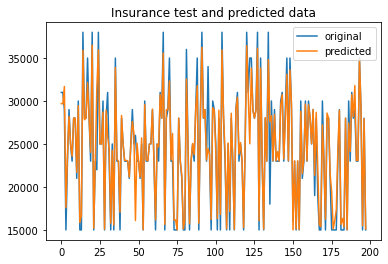

In [302]:
m =RandomForestRegressor(n_estimators=5000,random_state=1,max_depth=10,min_samples_split=10,min_samples_leaf=2)
m.fit(X_train,y_train)
y_pred = m.predict(X_test)
y_pred_train=m.predict(X_train)
    
print(f"Оценка точности для RandomForestRegressor:")
    
print("Коэфициент детерминации:",(m.score(X_test,y_test)*100),"%")
print("Погрешность для тренировочных данных:",mean_absolute_percentage_error(y_train, y_pred_train) * 100)
print("Погрешность для тестовых данных:",mean_absolute_percentage_error(y_test, y_pred) * 100,end="\t")

# сравним графики реальных и прогнозных значений
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Insurance test and predicted data")
plt.legend()
plt.show()


После настройки гиперпараметров модель RandomForestRegressor показывает точность(коэффициент детерминации 91,12%). Разница между погрешностью для тренировочных и тестовых данных также уменьшилась.